In [22]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values.reshape(-1, 1)

In [23]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

D:\anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [24]:
# Fitting SVR to the dataset
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X, y)

D:\anaconda3\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [21]:
# Predicting a new result
y_pred = regressor.predict(6.5)
y_pred = sc_y.inverse_transform(y_pred)
print(y_pred)

[ 252789.13921624]


In [26]:
def linspacious(X, factor=3):
    space = np.linspace(min(X), max(X))
    d = space[1] - space[0]
    space = np.concatenate([[space[0] - factor*d], space, [space[-1] + factor*d]]).reshape(-1, 1)
    return space

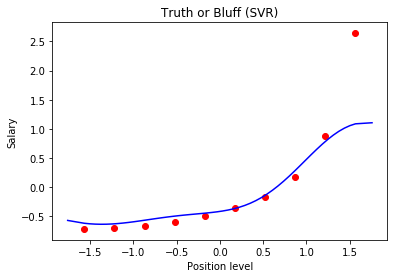

In [27]:
# Visualising the SVR results
plt.scatter(X, y, color = 'red')
plt.plot(linspacious(X), regressor.predict(linspacious(X)), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()